# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.140727e+01     6.769866e+00
 * time: 0.005969047546386719
     1     3.025768e+01     6.063397e+00
 * time: 0.01702117919921875
     2     2.948487e+01     1.574577e+01
 * time: 0.04487109184265137
     3     1.767166e+01     4.804503e+00
 * time: 0.07659721374511719
     4     1.279143e+01     1.833287e+00
 * time: 0.10748100280761719
     5     1.148608e+01     1.081556e+00
 * time: 0.24920916557312012
     6     1.077678e+01     1.765540e+00
 * time: 0.2695181369781494
     7     1.026900e+01     9.603735e-01
 * time: 0.28939008712768555
     8     9.981860e+00     7.713999e-01
 * time: 0.30992698669433594
     9     9.805514e+00     8.476705e-01
 * time: 0.33086609840393066
    10     9.628018e+00     1.091440e+00
 * time: 0.3518540859222412
    11     9.498583e+00     8.326032e-01
 * time: 0.3722851276397705
    12     9.426501e+00     4.701121e-01
 * time: 0.39275097846984863
    13     9.407491e+00     6.419831e-01
 * time: 0

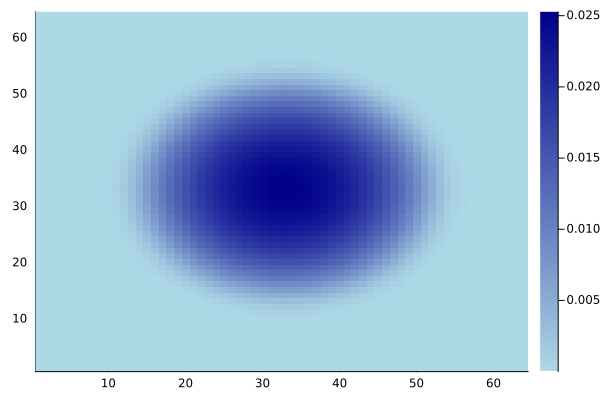

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)